In [ ]:
import os
import numpy as np
#ImageDataGenerator has been moved to tf.keras.utils.image_dataset_from_directory, or tf.keras.preprocessing.image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
#Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#load_img and image_to_array are now in tf.keras.utils
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.models import Model
from tensorflow.keras import layers
from IPython.display import display
from PIL import Image
from pickle import dump
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive


# Load the Drive helper and mount
project_path= "/content/drive/MyDrive/Colab Notebooks/My Project/"
dataset_path = project_path + "Datasets/"
model_path = project_path + "Model/"

train_path = dataset_path + "Training/"
valid_path = dataset_path + "Validation/"
test_path = dataset_path + "Testing/"

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:


# To use the Keras ImageDataGenerator class to create batches of data from the train, valid, and test directories.

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input).flow_from_directory(directory=train_path,color_mode="rgb", target_size=(224,224), classes=["basketball",  "cricket", "swimming", "table tennis"], batch_size=32)


valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input).flow_from_directory(directory=valid_path,color_mode="rgb", target_size=(224,224), classes=["basketball",   "cricket", "swimming", "table tennis"], batch_size=32)


test_batches = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input).flow_from_directory(directory=test_path,color_mode="rgb", target_size=(224,224), classes=["basketball",  "cricket", "swimming", "table tennis"], batch_size=60)

Found 3366 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Found 142 images belonging to 4 classes.


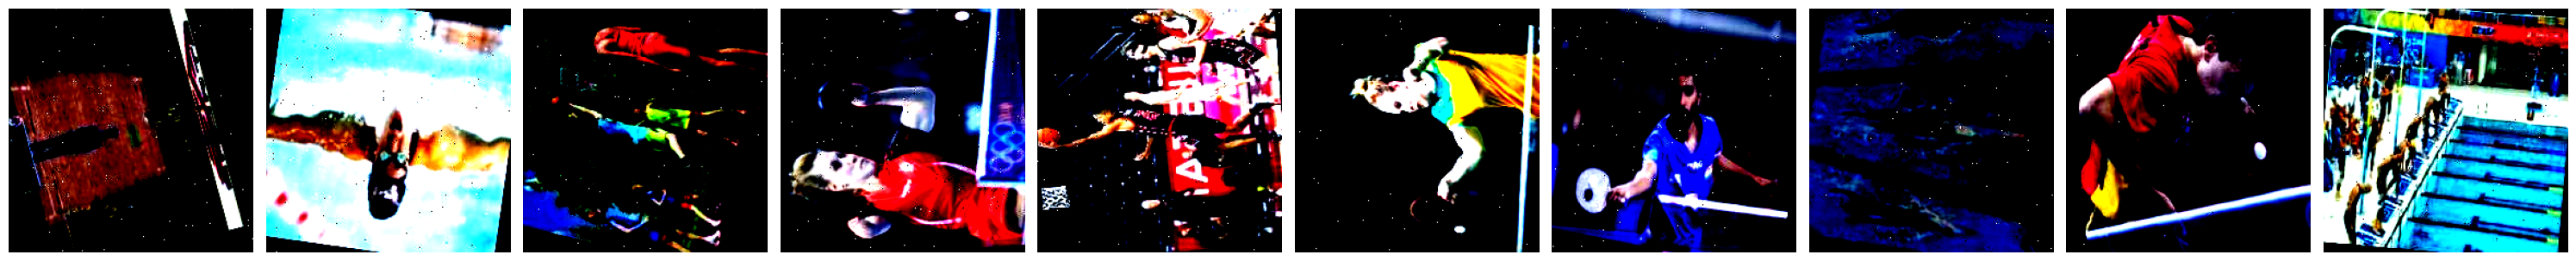

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [ ]:
#To Visualize The Data

imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
model = keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling="avg",
    classes=4,
    classifier_activation="softmax",
)
model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 6,957,956 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),
                kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, (3, 3), activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(256, (3, 3), activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(512, (3, 3), activation='relu',
                kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),
  layers.Dense(4096, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(4, activation='softmax')
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │      52,432,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │          16,388 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,017,860 (206.06 MB)

 Trainable params: 54,017,860 (206.06 MB)

 Non-trainable params: 0 (0.00 B)

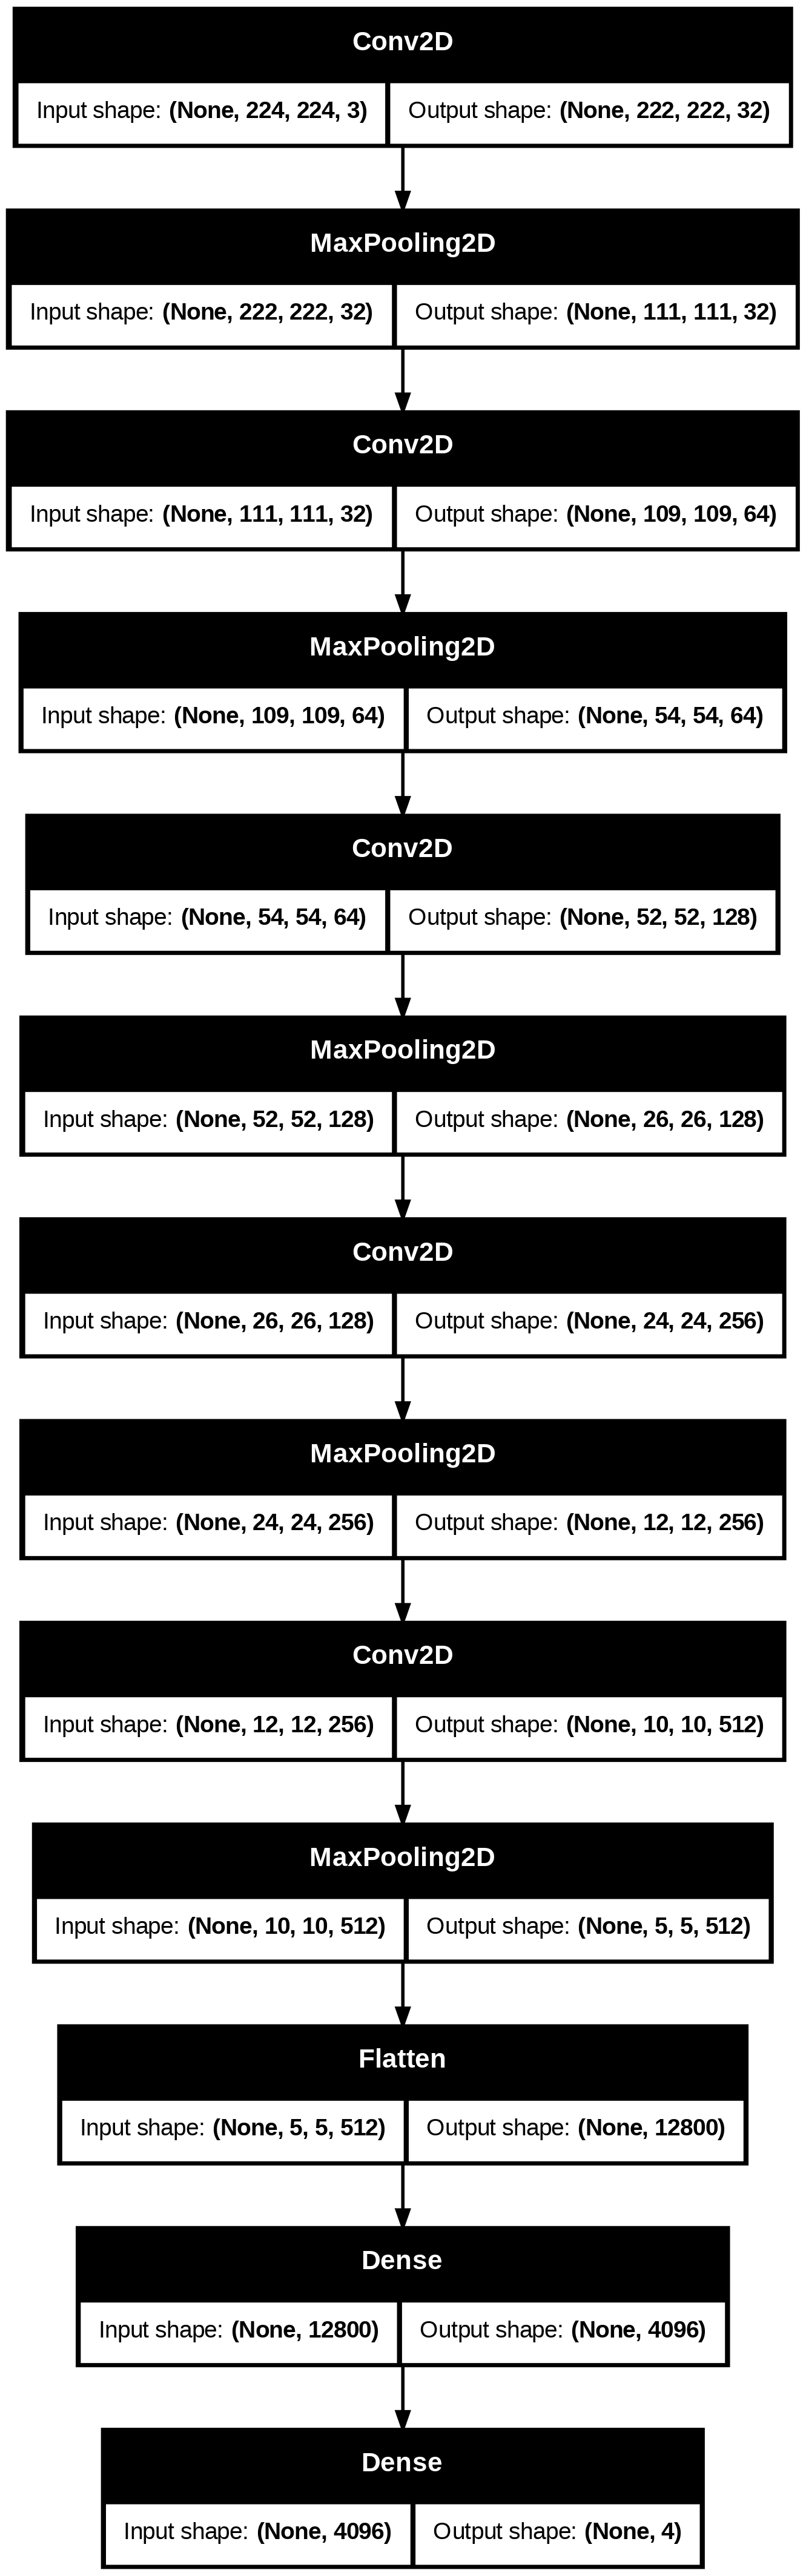

In [ ]:
keras.utils.plot_model(model, "MyCNN.png", show_shapes=True)


In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=32)

Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 218ms/step - accuracy: 0.3734 - loss: 24.5535 - val_accuracy: 0.5857 - val_loss: 1.4152
Epoch 2/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 32s 153ms/step - accuracy: 0.6427 - loss: 1.2513 - val_accuracy: 0.7929 - val_loss: 0.8559
Epoch 3/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.7046 - loss: 0.9937 - val_accuracy: 0.7643 - val_loss: 0.8675
Epoch 4/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.7994 - loss: 0.7929 - val_accuracy: 0.8500 - val_loss: 0.6591
Epoch 5/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.8137 - loss: 0.7352 - val_accuracy: 0.8357 - val_loss: 0.5691
Epoch 6/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.8178 - loss: 0.6916 - val_accuracy: 0.8786 - val_loss: 0.5329
Epoch 7/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.8381 - loss: 0.6563 - val_accuracy: 0.8643 - val_loss: 0.6045
Epoch 8/32
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.8485 - loss: 0.6208 - va

In [ ]:
model.save(model_path + "model_CNN.keras")  # creates a HDF5 file 'my_model.h5'

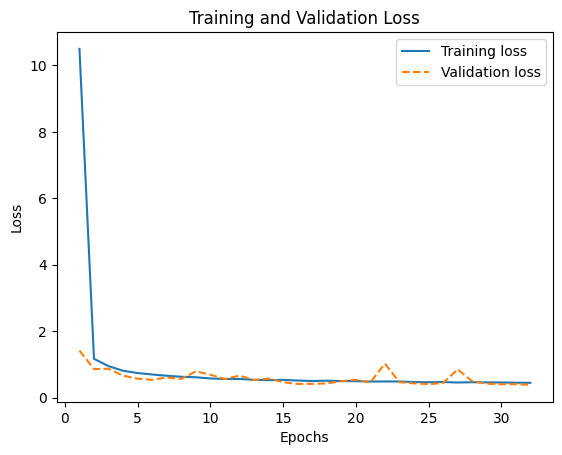

In [ ]:

trainloss = history.history["loss"]
validloss = history.history["val_loss"]


epochs = range(1, len(trainloss) + 1)
plt.plot(epochs, trainloss, "-", label="Training loss")
plt.plot(epochs, validloss, "--", label="Validation loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

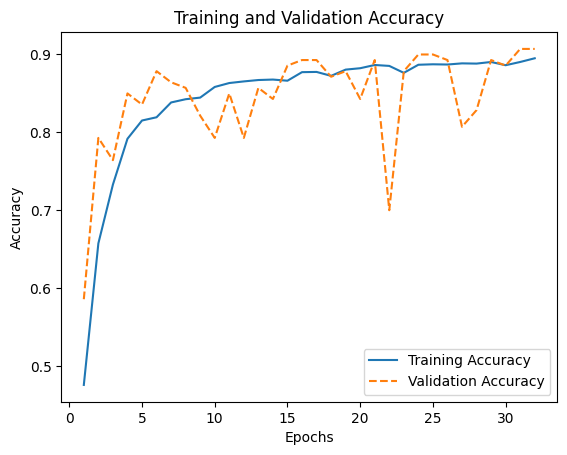

In [ ]:
trainaccuracy = history.history["accuracy"]
validaccuracy = history.history["val_accuracy"]


epochs = range(1, len(trainaccuracy) + 1)
plt.plot(epochs, trainaccuracy, "-", label="Training Accuracy")
plt.plot(epochs, validaccuracy, "--", label="Validation Accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Loading the model:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model(model_path + "model_CNN.keras")

In [ ]:
model.evaluate(test_batches)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8642 - loss: 0.5922


[0.624701976776123, 0.8450704216957092]

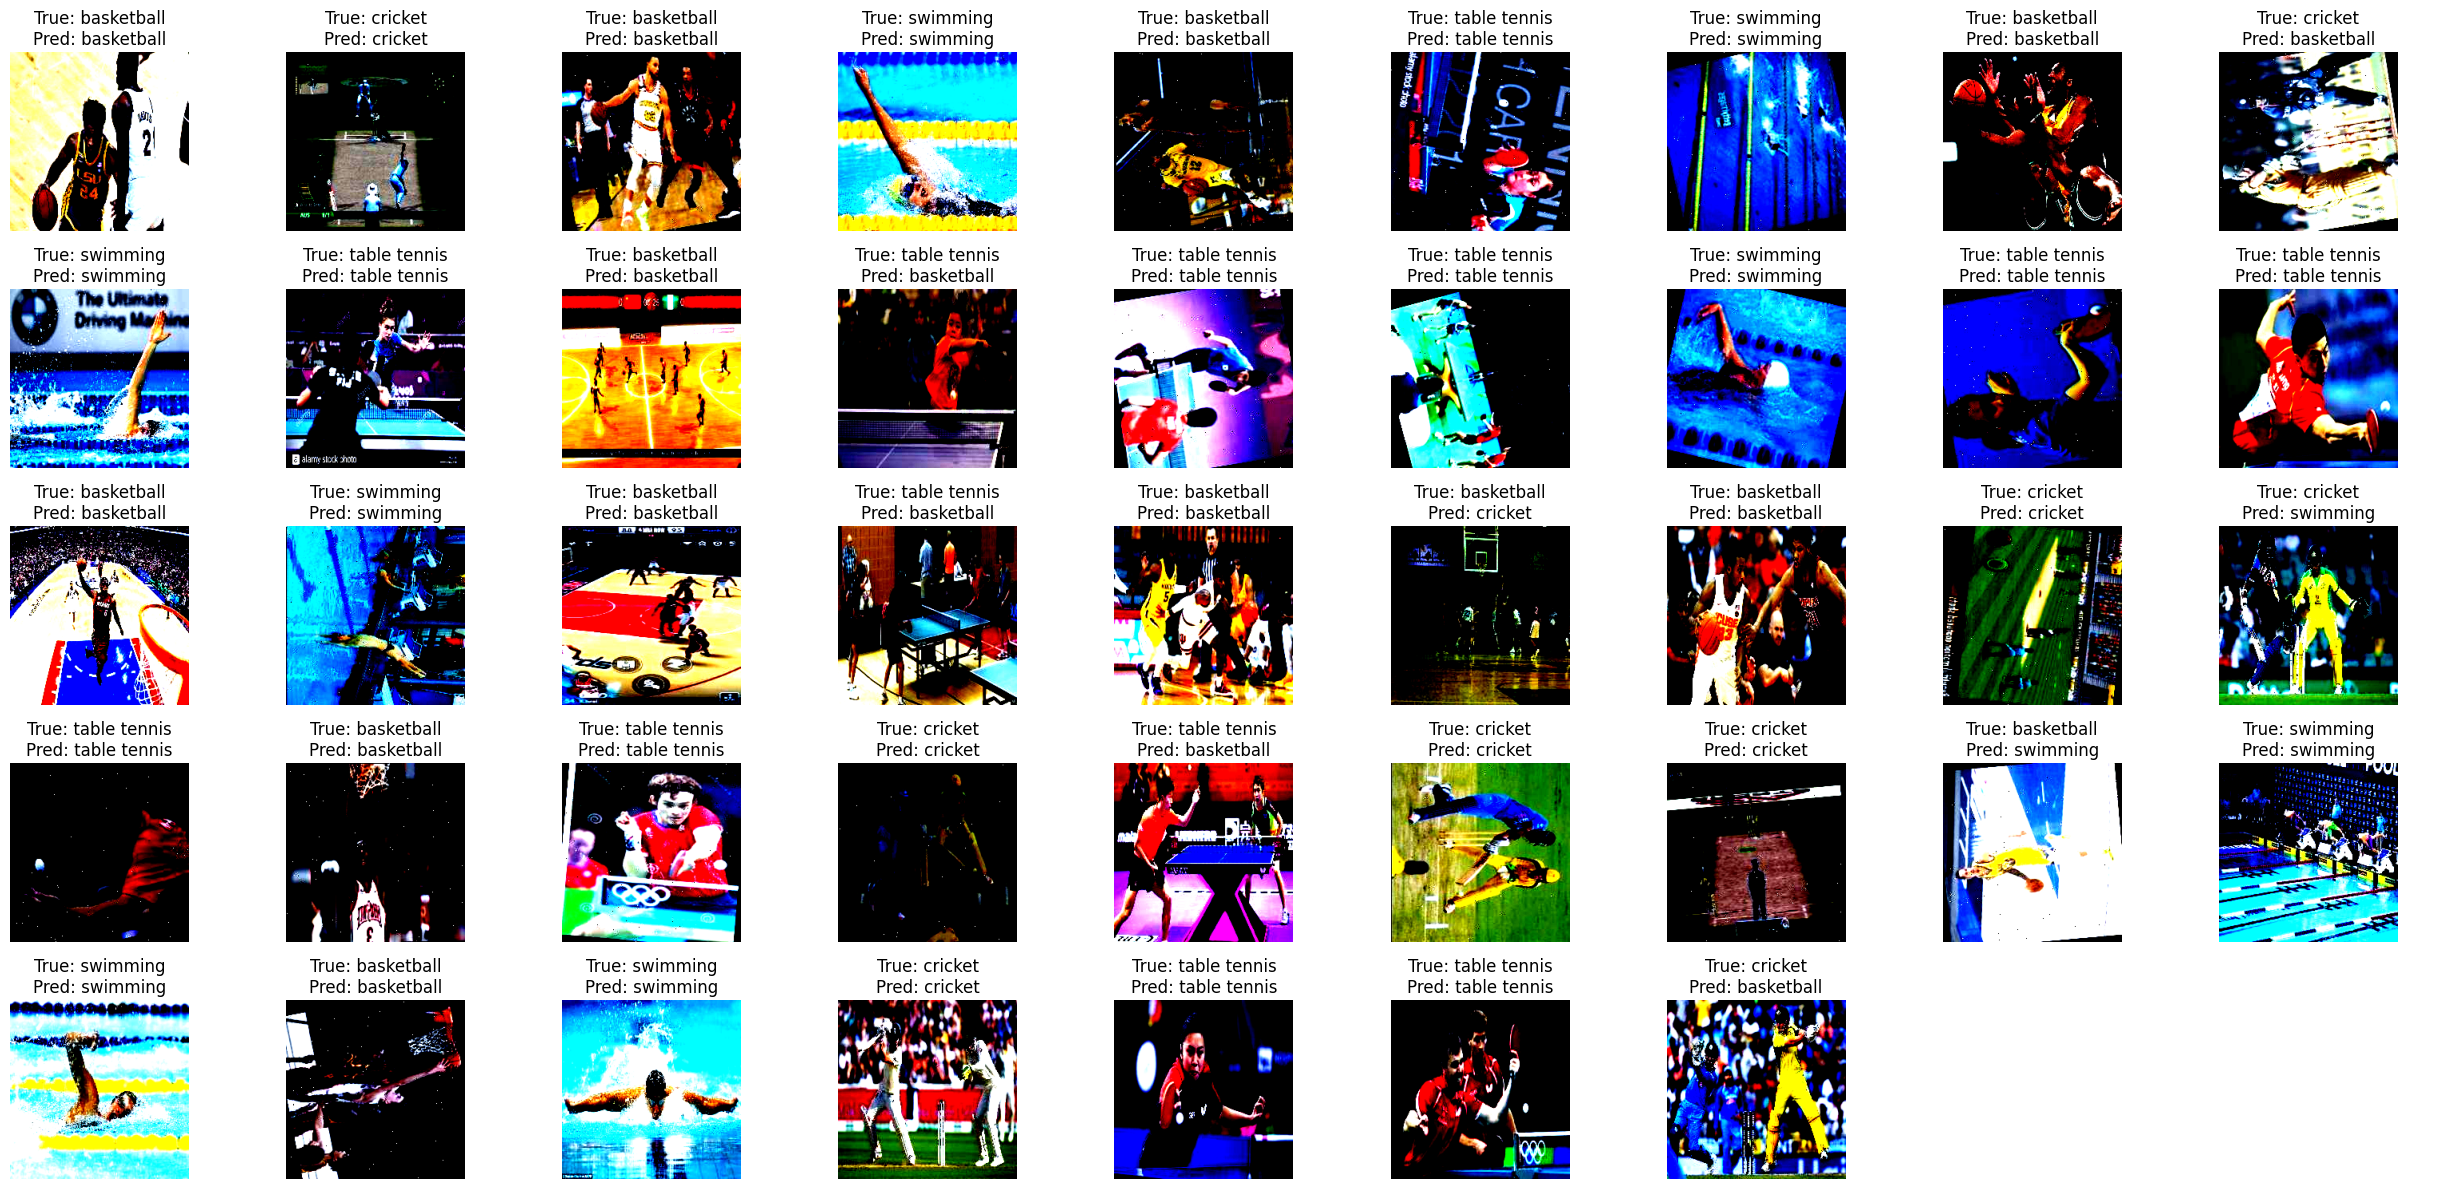

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first 43 images and labels from the test set
test_batches.reset()  # Reset the generator to start from the beginning
test_imgs, test_labels = next(test_batches)
test_imgs, test_labels = test_imgs[:43], test_labels[:43]  # Take only the first 43
test_labels = np.argmax(test_labels, axis=-1)

# Get model predictions for these images
predictions = model.predict(test_imgs, verbose=0)
predictions = np.argmax(predictions, axis=-1)

# Define class labels
class_labels = ["basketball",  "cricket", "swimming", "table tennis"]

#Adjust the subplot grid to accommodate 43 images
num_rows = 5  # Number of rows in the grid
num_cols = 9 # Number of columns in the grid
# Calculate the number of images that won't fit perfectly in the grid
remainder = 43 % num_cols
# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12))
# Flatten the axes array for easier iteration
axes = axes.ravel()

# Plot the images with predictions
for i in range(43):
    axes[i].imshow(test_imgs[i])
    axes[i].set_title(f"True: {class_labels[test_labels[i]]}\nPred: {class_labels[predictions[i]]}")
    axes[i].axis("off")

# Hide any remaining empty subplots
for i in range(43, num_rows * num_cols):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_imgs, test_labels = next(test_batches)
test_labels = np.argmax(test_labels, axis=-1)
predictions = model.predict(test_imgs, verbose=2)
predictions = np.argmax(predictions, axis=-1)




2/2 - 0s - 185ms/step


Confusion matrix, without normalization
[[14  0  1  1]
 [ 1  8  2  1]
 [ 0  0 15  1]
 [ 3  0  3 10]]


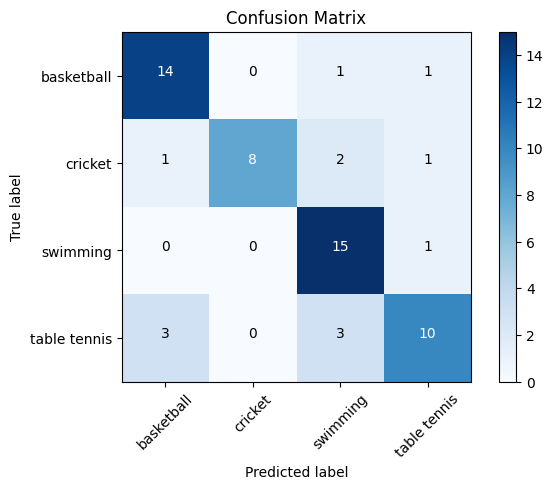

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)

cm_plot_labels = ["basketball", "cricket", "swimming", "table tennis"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')